# Gauss-Seidel:

In [1]:
import numpy as np

def gauss_seidel(A, b, x0, epsilon, maxit):
  """
  Implementação do método de Gauss-Seidel.
  
  Parâmetros:
  A: matriz dos coeficientes
  b: vetor de termos independentes
  x0: aproximação inicial
  epsilon: tolerância
  maxit: número máximo de iterações
  
  Retorna:
  x: solução aproximada
  norm_res: norma do resíduo final
  norm_rel: erro relativo final
  k: número de iterações realizadas
  """
  n = len(A)
  x = x0.copy()

  print(f"{'k':^3} {'normres':^15} {'normrel':^15}")
  print("-" * 35)
  
  for k in range(1, maxit + 1):
      x_old = x.copy()

      for i in range(n):
          sum1 = sum(A[i][j] * x[j] for j in range(i))
          sum2 = sum(A[i][j] * x_old[j] for j in range(i + 1, n))
          x[i] = (b[i] - sum1 - sum2) / A[i][i]
     
      residuo = b - np.dot(A, x)
      normres = np.max(np.abs(residuo))  
      normrel = np.max(np.abs(x - x_old)) / np.max(np.abs(x)) 

      print(f"{k:3d} {normres:15.5e} {normrel:15.5e}")

      if normres < epsilon:
          break
  
  return x, normres, normrel, k

# Exemplo 
def exemplo_gauss_seidel():
  A = np.array([[4, 1, 2],
                [3, 5, 1],
                [1, 1, 3]], dtype=float)
  b = np.array([4, 7, 3], dtype=float)
  x0 = np.zeros(len(b))  
  epsilon = 1e-6  
  maxit = 50  

  x_sol, normres_final, normrel_final, iteracoes = gauss_seidel(A, b, x0, epsilon, maxit)

  print("\nResultados finais:")
  print(f"Solução aproximada x*: {x_sol}")
  print(f"Norma infinito do resíduo b - Ax*: {normres_final:.6e}")
  print(f"Erro relativo final: {normrel_final:.6e}")
  print(f"Número de iterações realizadas: {iteracoes}")

exemplo_gauss_seidel()

 k      normres         normrel    
-----------------------------------
  1     1.60000e+00     1.00000e+00
  2     3.20000e-01     4.16667e-01
  3     6.40000e-02     8.06452e-02
  4     1.28000e-02     1.60256e-02
  5     2.56000e-03     3.20102e-03
  6     5.12000e-04     6.40041e-04
  7     1.02400e-04     1.28002e-04
  8     2.04800e-05     2.56001e-05
  9     4.09600e-06     5.12000e-06
 10     8.19200e-07     1.02400e-06

Resultados finais:
Solução aproximada x*: [0.50000026 0.9999999  0.49999995]
Norma infinito do resíduo b - Ax*: 8.192000e-07
Erro relativo final: 1.024000e-06
Número de iterações realizadas: 10


# Gauss-Jacobi:

In [2]:
import numpy as np

def gauss_jacobi(A, b, x0, epsilon, maxit):
  """
  Implementação do Método de Gauss-Jacobi.
  
  Parâmetros:
  A: matriz dos coeficientes
  b: vetor de termos independentes
  x0: aproximação inicial
  epsilon: tolerância
  maxit: número máximo de iterações
  
  Retorna:
  x: solução aproximada
  Eres: norma do resíduo final
  Erel: erro relativo final
  k: número de iterações realizadas
  """
  n = len(A)
  k = 0
  Erel = 1
  Eres = 1
  x = np.zeros(n)

  D = np.diag(np.diag(A))  
  L = np.tril(A, -1)       
  U = np.triu(A, 1)        
  M = L + U                


  D_inv = np.diag(1/np.diag(A))
  

  print(f"{'k':^3} {'normres':^15} {'normrel':^15}")
  print("-" * 35)
  
  while (Erel > epsilon) and (Eres > epsilon) and (k <= maxit):
   
    x = np.dot(D_inv, (b - np.dot(M, x0)))
    
    residuo = b - np.dot(A, x)
    Eres = np.max(np.abs(residuo))  
   
    Erel = np.max(np.abs(x - x0)) / np.max(np.abs(x)) 

    print(f"{k+1:3d} {Eres:15.5e} {Erel:15.5e}")

    x0 = x.copy()
    k += 1
  
  return x, Eres, Erel, k

# Exemplo:
def exemplo_gauss_jacobi():
  A = np.array([[4, 1, 2],
                [3, 5, 1],
                [1, 1, 3]], dtype=float)
  b = np.array([4, 7, 3], dtype=float)
  x0 = np.zeros(len(b)) 
  epsilon = 1e-6        
  maxit = 50          

  x_sol, Eres_final, Erel_final, iteracoes = gauss_jacobi(A, b, x0, epsilon, maxit)

  print("\nResultados finais:")
  print(f"Solução aproximada x*: {x_sol}")
  print(f"Norma infinito do resíduo b - Ax*: {Eres_final:.6e}")
  print(f"Erro relativo final: {Erel_final:.6e}")
  print(f"Número de iterações realizadas: {iteracoes}")

exemplo_gauss_jacobi()

 k      normres         normrel    
-----------------------------------
  1     4.00000e+00     1.00000e+00
  2     3.35000e+00     1.41667e+00
  3     2.35000e+00     5.27559e-01
  4     1.75083e+00     5.87500e-01
  5     1.29167e+00     3.04449e-01
  6     9.45319e-01     2.89665e-01
  7     6.99403e-01     1.74914e-01
  8     5.13067e-01     1.48648e-01
  9     3.78392e-01     9.83235e-02
 10     2.78273e-01     7.81840e-02
 11     2.04908e-01     5.43710e-02
 12     1.50817e-01     4.17062e-02
 13     1.11013e-01     2.97825e-02
 14     8.17191e-02     2.24137e-02
 15     6.01504e-02     1.62313e-02
 16     4.42772e-02     1.20917e-02
 17     3.25915e-02     8.82231e-03
 18     2.39905e-02     6.53637e-03
 19     1.76591e-02     4.78835e-03
 20     1.29987e-02     3.53711e-03
 21     9.56820e-03     2.59688e-03
 22     7.04306e-03     1.91519e-03
 23     5.18433e-03     1.40777e-03
 24     3.81613e-03     1.03732e-03
 25     2.80901e-03     7.62979e-04
 26     2.06769e-03     5.61

## Item 2

In [3]:
def gerar_matriz_A(alfa, beta, n):
  A = np.zeros((n, n))
  for i in range(n):
      for j in range(n):
          if j == i:
              A[i,j] = alfa
          elif j == i-1 or j == i+1:
              A[i,j] = -beta
  return A

def gerar_vetor_b(alfa, beta, n):
  b = np.zeros(n)
  for i in range(n):
      if i == 0 or i == n-1:
          b[i] = alfa - beta
      else:
          b[i] = alfa - 2*beta
  return b

## Item 3

Resultados para α = 4 e β = 1:

Método de Gauss-Jacobi:
 k      normres         normrel    
-----------------------------------
  1     1.25000e+00     1.00000e+00
  2     5.62500e-01     3.57143e-01
  3     2.65625e-01     1.47541e-01
  4     1.28906e-01     6.80000e-02
  5     6.34766e-02     3.25444e-02
  6     3.14941e-02     1.59470e-02
  7     1.57471e-02     7.89039e-03
  8     7.85828e-03     3.94098e-03
  9     3.92151e-03     1.96551e-03
 10     1.95789e-03     9.80613e-04
 11     9.77516e-04     4.89527e-04
 12     4.88281e-04     2.44393e-04
 13     2.43828e-04     1.22073e-04
 14     1.21389e-04     6.09577e-05
 15     6.06552e-05     3.03473e-05
 16     3.01041e-05     1.51638e-05
 17     1.50485e-05     7.52603e-06
 18     7.45797e-06     3.76214e-06
 19     3.72453e-06     1.86449e-06
 20     1.84376e-06     9.31134e-07
 21     9.19897e-07     4.60940e-07
 22     4.54981e-07     2.29974e-07
 23     2.26796e-07     1.13745e-07
 24     1.12100e-07     5.66989e-08
 25     

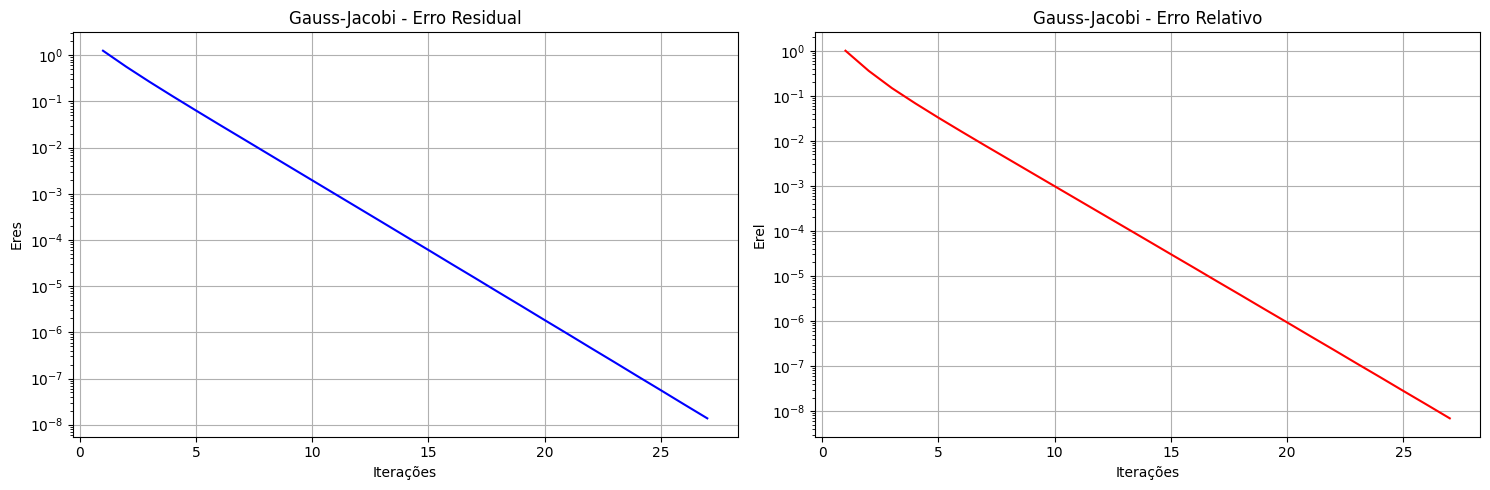


Método de Gauss-Seidel:
 k      normres         normrel    
-----------------------------------
  1     9.16667e-01     1.00000e+00
  2     2.84722e-01     2.88225e-01
  3     8.96991e-02     8.98876e-02
  4     2.85976e-02     2.86089e-02
  5     9.20702e-03     9.20773e-03
  6     2.98762e-03     2.98767e-03
  7     9.75530e-04     9.75533e-04
  8     3.20090e-04     3.20090e-04
  9     1.05425e-04     1.05425e-04
 10     3.48237e-05     3.48237e-05
 11     1.15283e-05     1.15283e-05
 12     3.82278e-06     3.82278e-06
 13     1.26917e-06     1.26917e-06
 14     4.21689e-07     4.21689e-07
 15     1.40126e-07     1.40126e-07
 16     4.66502e-08     4.66502e-08
 17     1.55012e-08     1.55012e-08
 18     5.12176e-09     5.12176e-09


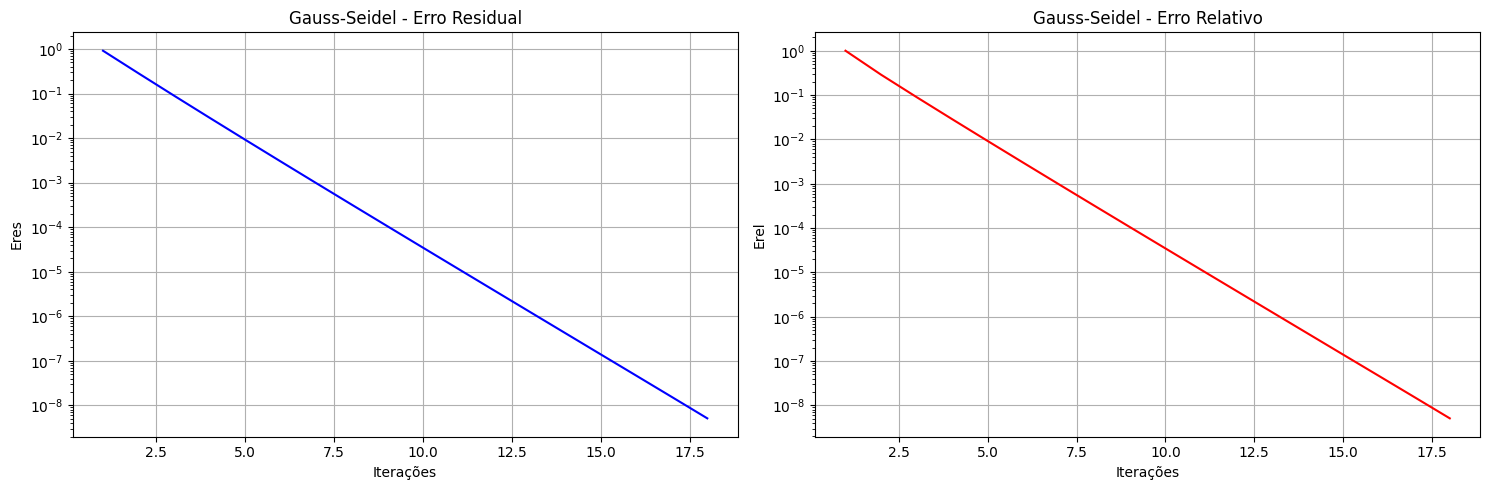

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi_com_historico(A, b, x0, epsilon, maxit):
  n = len(A)
  k = 0
  Erel = 1
  Eres = 1
  x = np.zeros(n)
  erros_res = []
  erros_rel = []
  
  D = np.diag(np.diag(A))
  L = np.tril(A, -1)
  U = np.triu(A, 1)
  M = L + U
  D_inv = np.diag(1/np.diag(A))
  
  print(f"{'k':^3} {'normres':^15} {'normrel':^15}")
  print("-" * 35)
  
  while (Erel > epsilon) and (Eres > epsilon) and (k < maxit):
      x = np.dot(D_inv, (b - np.dot(M, x0)))
      
      residuo = b - np.dot(A, x)
      Eres = np.max(np.abs(residuo))
      Erel = np.max(np.abs(x - x0)) / np.max(np.abs(x))
      
      erros_res.append(Eres)
      erros_rel.append(Erel)
      
      print(f"{k+1:3d} {Eres:15.5e} {Erel:15.5e}")
      
      x0 = x.copy()
      k += 1
  
  return x, Eres, Erel, k, erros_res, erros_rel

def gauss_seidel_com_historico(A, b, x0, epsilon, maxit):
  n = len(A)
  x = x0.copy()
  erros_res = []
  erros_rel = []
  
  print(f"{'k':^3} {'normres':^15} {'normrel':^15}")
  print("-" * 35)
  
  for k in range(1, maxit + 1):
      x_old = x.copy()
      
      for i in range(n):
          sum1 = sum(A[i][j] * x[j] for j in range(i))
          sum2 = sum(A[i][j] * x_old[j] for j in range(i + 1, n))
          x[i] = (b[i] - sum1 - sum2) / A[i][i]
      
      residuo = b - np.dot(A, x)
      normres = np.max(np.abs(residuo))
      normrel = np.max(np.abs(x - x_old)) / np.max(np.abs(x))
      
      erros_res.append(normres)
      erros_rel.append(normrel)
      
      print(f"{k:3d} {normres:15.5e} {normrel:15.5e}")
      
      if normres < epsilon:
          break
  
  return x, normres, normrel, k, erros_res, erros_rel

# Função para plotar os gráficos
def plot_convergencia(erros_res, erros_rel, metodo):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
  
  # Gráfico do erro residual
  ax1.semilogy(range(1, len(erros_res)+1), erros_res, 'b-')
  ax1.grid(True)
  ax1.set_title(f'{metodo} - Erro Residual')
  ax1.set_xlabel('Iterações')
  ax1.set_ylabel('Eres')
  
  # Gráfico do erro relativo
  ax2.semilogy(range(1, len(erros_rel)+1), erros_rel, 'r-')
  ax2.grid(True)
  ax2.set_title(f'{metodo} - Erro Relativo')
  ax2.set_xlabel('Iterações')
  ax2.set_ylabel('Erel')
  
  plt.tight_layout()
  plt.show()

# Item 3 - Teste com α = 4 e β = 1
n = 20
alfa = 4
beta = 1
x0 = np.zeros(n)
epsilon = 1e-8
maxit = 2000

A = gerar_matriz_A(alfa, beta, n)
b = gerar_vetor_b(alfa, beta, n)

print("Resultados para α = 4 e β = 1:")
print("\nMétodo de Gauss-Jacobi:")
x_j, eres_j, erel_j, k_j, hist_res_j, hist_rel_j = gauss_jacobi_com_historico(A, b, x0, epsilon, maxit)
plot_convergencia(hist_res_j, hist_rel_j, "Gauss-Jacobi")

print("\nMétodo de Gauss-Seidel:")
x_s, eres_s, erel_s, k_s, hist_res_s, hist_rel_s = gauss_seidel_com_historico(A, b, x0, epsilon, maxit)
plot_convergencia(hist_res_s, hist_rel_s, "Gauss-Seidel")

## Item 4 - Teste com α = 1 e β = 1


Resultados para α = 1 e β = 1:

Método de Gauss-Jacobi:
 k      normres         normrel    
-----------------------------------
  1     2.00000e+00     1.00000e+00
  2     4.00000e+00     6.66667e-01
  3     8.00000e+00     5.71429e-01
  4     1.60000e+01     5.33333e-01
  5     3.20000e+01     5.16129e-01
  6     6.40000e+01     5.07937e-01
  7     1.28000e+02     5.03937e-01
  8     2.56000e+02     5.01961e-01
  9     5.11000e+02     5.00978e-01
 10     1.02200e+03     5.00000e-01
 11     2.03500e+03     5.00000e-01
 12     4.06900e+03     4.98897e-01
 13     8.08400e+03     4.99386e-01
 14     1.61560e+04     4.98029e-01
 15     3.20390e+04     4.98827e-01
 16     6.39880e+04     4.97292e-01
 17     1.26716e+05     4.98291e-01
 18     2.52888e+05     4.96670e-01
 19     5.00268e+05     4.97792e-01
 20     9.97629e+05     4.96156e-01
 21     1.97200e+06     4.97343e-01
 22     3.92964e+06     4.95737e-01
 23     7.76335e+06     4.96947e-01
 24     1.54594e+07     4.95399e-01
 25    

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


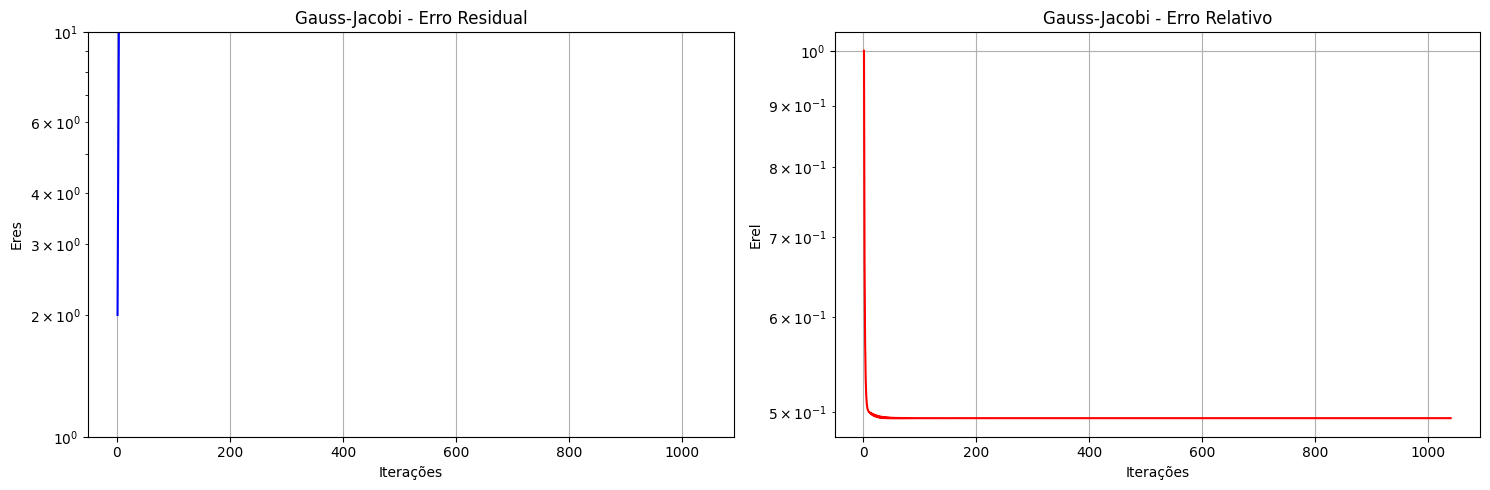


Método de Gauss-Seidel:
 k      normres         normrel    
-----------------------------------
  1     1.80000e+01     1.00000e+00
  2     1.89000e+02     9.13043e-01
  3     1.51700e+03     8.79930e-01
  4     1.03260e+04     8.56929e-01
  5     6.28560e+04     8.39132e-01
  6     3.53017e+05     8.24954e-01
  7     1.86632e+06     8.13480e-01
  8     9.41569e+06     8.04077e-01
  9     4.57731e+07     7.96289e-01
 10     2.15956e+08     7.89777e-01
 11     9.94168e+08     7.84287e-01
 12     4.48440e+09     7.79623e-01
 13     1.98848e+10     7.75635e-01
 14     8.69047e+10     7.72202e-01
 15     3.75138e+11     7.69231e-01
 16     1.60220e+12     7.66646e-01
 17     6.78010e+12     7.64388e-01
 18     2.84624e+13     7.62405e-01
 19     1.18647e+14     7.60658e-01
 20     4.91541e+14     7.59113e-01
 21     2.02533e+15     7.57741e-01
 22     8.30486e+15     7.56520e-01
 23     3.39080e+16     7.55430e-01
 24     1.37914e+17     7.54454e-01
 25     5.59012e+17     7.53577e-01
 26

C:\Users\Desktop\AppData\Local\Temp\ipykernel_56128\3166514724.py:54: RuntimeWarning: overflow encountered in scalar subtract
  x[i] = (b[i] - sum1 - sum2) / A[i][i]
C:\Users\Desktop\AppData\Local\Temp\ipykernel_56128\3166514724.py:58: RuntimeWarning: invalid value encountered in scalar divide
  normrel = np.max(np.abs(x - x_old)) / np.max(np.abs(x))
C:\Users\Desktop\AppData\Local\Temp\ipykernel_56128\3166514724.py:53: RuntimeWarning: invalid value encountered in scalar multiply
  sum2 = sum(A[i][j] * x_old[j] for j in range(i + 1, n))


1721             nan             nan
1722             nan             nan
1723             nan             nan
1724             nan             nan
1725             nan             nan
1726             nan             nan
1727             nan             nan
1728             nan             nan
1729             nan             nan
1730             nan             nan
1731             nan             nan
1732             nan             nan
1733             nan             nan
1734             nan             nan
1735             nan             nan
1736             nan             nan
1737             nan             nan
1738             nan             nan
1739             nan             nan
1740             nan             nan
1741             nan             nan
1742             nan             nan
1743             nan             nan
1744             nan             nan
1745             nan             nan
1746             nan             nan
1747             nan             nan
1

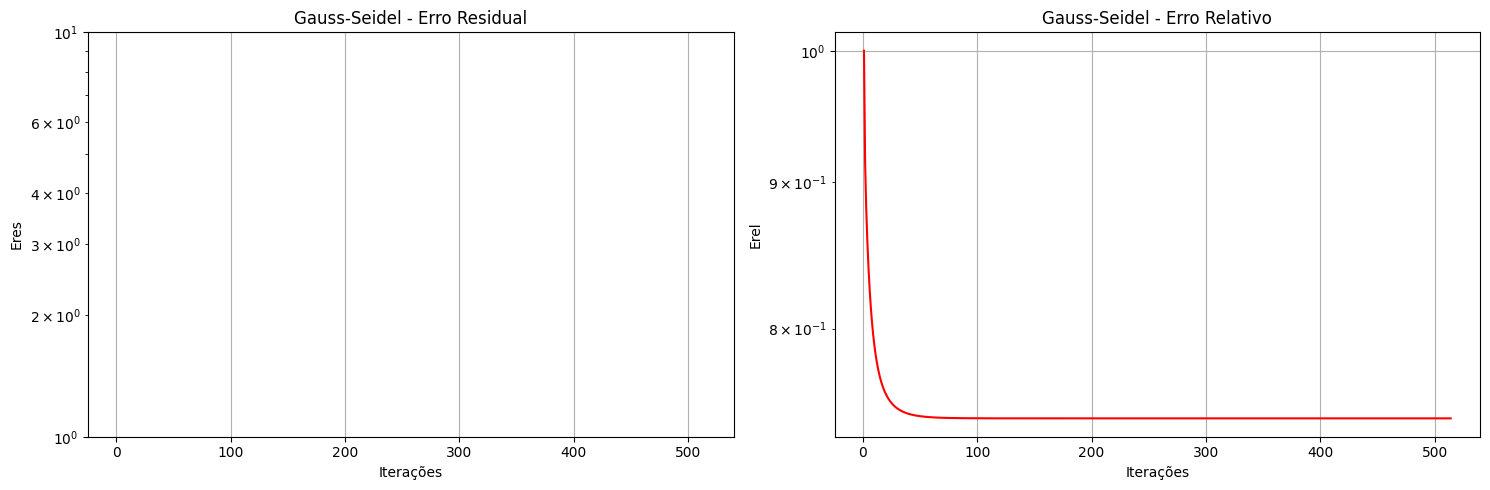

In [5]:
alfa = 1
beta = 1
A = gerar_matriz_A(alfa, beta, n)
b = gerar_vetor_b(alfa, beta, n)

print("\nResultados para α = 1 e β = 1:")
print("\nMétodo de Gauss-Jacobi:")
x_j, eres_j, erel_j, k_j, hist_res_j, hist_rel_j = gauss_jacobi_com_historico(A, b, x0, epsilon, maxit)
plot_convergencia(hist_res_j, hist_rel_j, "Gauss-Jacobi")

print("\nMétodo de Gauss-Seidel:")
x_s, eres_s, erel_s, k_s, hist_res_s, hist_rel_s = gauss_seidel_com_historico(A, b, x0, epsilon, maxit)
plot_convergencia(hist_res_s, hist_rel_s, "Gauss-Seidel")

# Exercício 2

## Item 2

In [8]:
import numpy as np

A = np.array([
    [-1, 0, 0, np.sqrt(2)/2, 1, 0, 0, 0],
    [0, -1, 0, np.sqrt(2)/2, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0, 0.5, 0],
    [0, 0, 0, -np.sqrt(2)/2, 0, -1, -0.5, 0],
    [0, 0, 0, 0, -1, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, -np.sqrt(2)/2, 0, 0, np.sqrt(3)/2, 0],
    [0, 0, 0, 0, 0, 0, -np.sqrt(3)/2, -1]
])

b = np.array([0, 0, 0, 0, 0, 10000, 0, 0])

x0 = np.zeros(8)

epsilon = 1e-8
max_iterations = 2000

print("Resultados pelo Método de Gauss-Jacobi:")
gauss_jacobi(A, b, x0, epsilon, max_iterations)

print("Resultados pelo Método de Gauss-Seidel:")
gauss_seidel(A, b, x0, epsilon, max_iterations)


Resultados pelo Método de Gauss-Jacobi:
 k      normres         normrel    
-----------------------------------
  1     1.00000e+04     1.00000e+00
  2     1.00000e+04     1.00000e+00
  3     1.00000e+04     8.16497e-01
  4     1.00000e+04     8.66025e-01
  5     1.00000e+04     1.00000e+00
  6     5.77350e+03     9.35347e-01
  7     5.77350e+03     5.40023e-01
  8     3.33333e+03     5.77350e-01
  9     3.33333e+03     3.33333e-01
 10     1.92450e+03     3.33333e-01
 11     1.92450e+03     1.92450e-01
 12     1.11111e+03     1.92450e-01
 13     1.11111e+03     1.11111e-01
 14     6.41500e+02     1.11111e-01
 15     6.41500e+02     6.41500e-02
 16     3.70370e+02     6.41500e-02
 17     3.70370e+02     3.70370e-02
 18     2.13833e+02     3.70370e-02
 19     2.13833e+02     2.13833e-02
 20     1.23457e+02     2.13833e-02
 21     1.23457e+02     1.23457e-02
 22     7.12778e+01     1.23457e-02
 23     7.12778e+01     7.12778e-03
 24     4.11523e+01     7.12778e-03
 25     4.11523e+01     

(array([-3.93538357e-09, -6.33974596e+03, -3.66025404e+03, -8.96575472e+03,
         6.33974596e+03,  1.00000000e+04, -7.32050808e+03,  6.33974596e+03]),
 np.float64(6.208210834302008e-09),
 np.float64(1.0750227374956011e-12),
 55)